  Yas Kilo Kolesterol Hipertansiyon Hasta
0  25   60     Normal          Evet     0
1  45   80     Yuksek         Hayir     1
2  30   70     Normal         Hayir     0
3  22   55     Normal          Evet     0
4  40   75     Yuksek         Hayir     1
Kolesterol Icin Dogruluk Degeri: 0.6666666666666666
Hipertansiyon Icin Dogruluk Degeri: 0.4


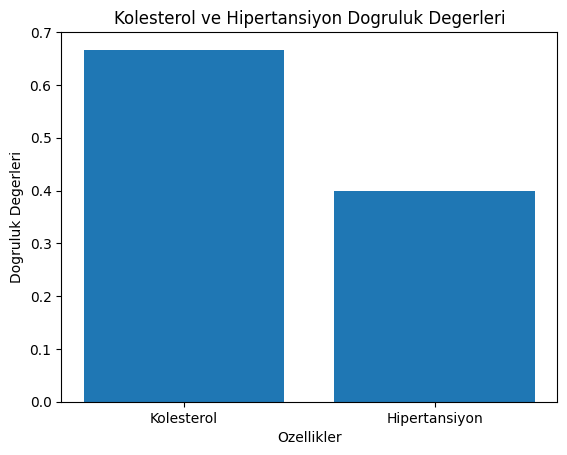

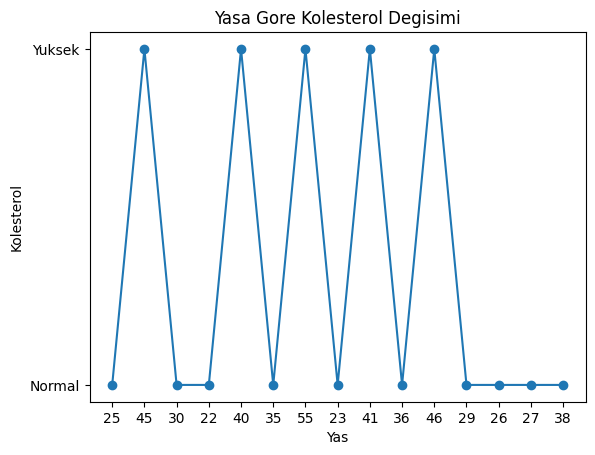

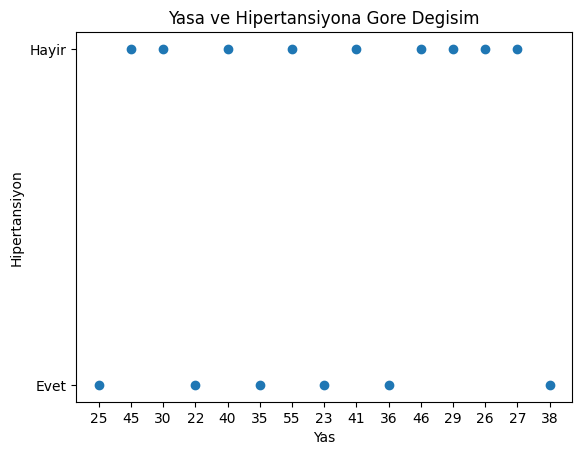

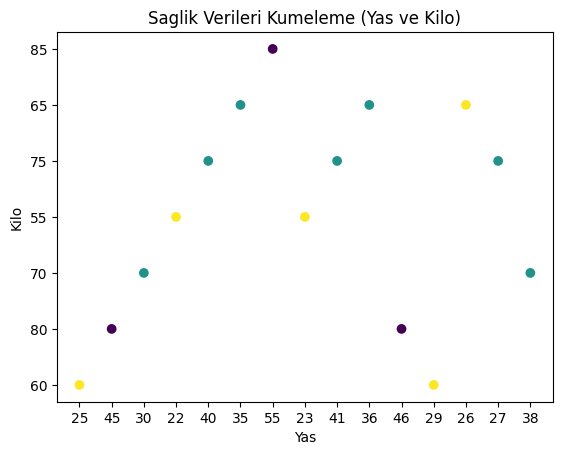

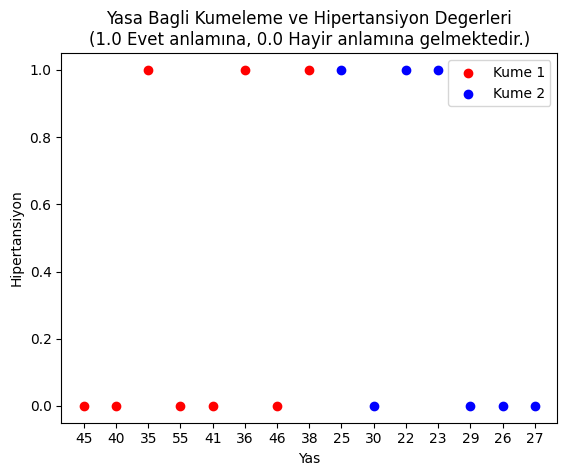


Verilerin en son kumeleme isleminin de dahil edilmis hali 
(kume : 1 ise mavi renk, kume : 0 ise kirmizi renktir.)
   Yas Kilo  Kolesterol  Hipertansiyon Hasta  Kume
0   25   60           0              1     0     1
1   45   80           1              0     1     0
2   30   70           0              0     0     1
3   22   55           0              1     0     1
4   40   75           1              0     1     0
5   35   65           0              1     1     0
6   55   85           1              0     1     0
7   23   55           0              1     0     1
8   41   75           1              0     1     0
9   36   65           0              1     1     0
10  46   80           1              0     1     0
11  29   60           0              0     0     1
12  26   65           0              0     0     1
13  27   75           0              0     0     1
14  38   70           0              1     1     0


In [ ]:
"""
Projeyi yapan : Atakan Canbakış

Proje Adı : Sağlık İle İlgili Verileri Değerlendirme ve Görselleştirme

"""


import numpy as np
import pandas as pd
from sklearn.cluster import KMeans # Kumeleme icin gerekli olan kutuphane
import matplotlib.pyplot as plt # Garifikleri cizdirmek ve veri gorsellestirmek icin gerekli kutuphane



# Ornek saglik veri setini numpy ile olusturma
veri_seti = np.array([
    [25, 60, 'Normal', 'Evet', 0],  # [Yas, Kilo, Kolesterol, Hipertansiyon, Hasta]
    [45, 80, 'Yuksek', 'Hayir', 1],
    [30, 70, 'Normal', 'Hayir', 0],
    [22, 55, 'Normal', 'Evet', 0],
    [40, 75, 'Yuksek', 'Hayir', 1],
    [35, 65, 'Normal', 'Evet', 1],
    [55, 85, 'Yuksek', 'Hayir', 1],
    [23, 55, 'Normal', 'Evet', 0],
    [41, 75, 'Yuksek', 'Hayir', 1],
    [36, 65, 'Normal', 'Evet', 1],
    [46, 80, 'Yuksek', 'Hayir', 1],
    [29, 60, 'Normal', 'Hayir', 0],
    [26, 65, 'Normal', 'Hayir', 0],
    [27, 75, 'Normal', 'Hayir', 0],
    [38, 70, 'Normal', 'Evet', 1]
])

# Veri setini pandas DataFrame'e donusturme
veri_seti = pd.DataFrame(veri_seti, columns=['Yas', 'Kilo', 'Kolesterol', 'Hipertansiyon', 'Hasta'])

print(veri_seti.head())  # Veri setinin ilk 5 satirini goruntuleme


# Kolesterol Yuksek olan hastanin hasta olma dogruluk degeri
dogruluk = np.mean((veri_seti['Kolesterol'] == 'Yuksek')  == (veri_seti['Hasta'] == 1))
print("Kolesterol Icin Dogruluk Degeri:", dogruluk)

# Hipertansiyon'u olan hastanin hasta olma dogruluk degeri
dogruluk_ek = np.mean(( veri_seti['Hipertansiyon'] == 'Hayir') == (veri_seti['Hasta'] == 0))
print("Hipertansiyon Icin Dogruluk Degeri:", dogruluk_ek)

# Kolesterol ve Hipertansiyon Dogruluk Degerleri grafik ile gosterme
etiketler = ['Kolesterol', 'Hipertansiyon']
dogruluk_degerleri = [dogruluk, dogruluk_ek]

plt.bar(etiketler, dogruluk_degerleri)
plt.xlabel('Ozellikler')
plt.ylabel('Dogruluk Degerleri')
plt.title('Kolesterol ve Hipertansiyon Dogruluk Degerleri')
plt.show()


# Yasa Gore Kolesterol'e gore Cizgi grafigini cizme
plt.plot(veri_seti['Yas'], veri_seti['Kolesterol'], marker='o')
plt.xlabel("Yas")
plt.ylabel("Kolesterol")
plt.title("Yasa Gore Kolesterol Degisimi")
plt.show()



# Yasa ve Hipertansiyona Gore Grafik Cizdirme
plt.scatter(veri_seti['Yas'], veri_seti['Hipertansiyon'])
plt.xlabel("Yas")
plt.ylabel("Hipertansiyon")
plt.title("Yasa ve Hipertansiyona Gore Degisim")
plt.show()


# KMeans modelini olusturma ve uygulama. Yas ve kiloya gore 3 renk tane kumeye ayırdık.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(veri_seti[['Yas', 'Kilo']])

# Kume etiketlerini aldık
etiketler_ = kmeans.labels_

# Kumeleme sonuclarini gorsellestirme
plt.scatter(veri_seti['Yas'], veri_seti['Kilo'], c=etiketler_)
plt.xlabel('Yas')
plt.ylabel('Kilo')
plt.title('Saglik Verileri Kumeleme (Yas ve Kilo)')
plt.show()


# Kategorik sutunlari sayisal degerlere donusturme
veri_seti['Kolesterol'] = veri_seti['Kolesterol'].replace({'Normal': 0, 'Yuksek': 1})
veri_seti['Hipertansiyon'] = veri_seti['Hipertansiyon'].replace({'Hayir': 0, 'Evet': 1})


# 'Hipertansiyon' ve 'Yas' sutunlariyla kumeleme yapma
X = veri_seti[['Yas', 'Hipertansiyon']]
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
veri_seti['Kume'] = kmeans.fit_predict(X)


# Kumeleme grafigini cizme. Bir kismi kirmizi ile bir kismi mavi nokta ile gosterilmistir.
# 1.0 Evet anlamına, 0.0 Hayir anlamına gelmektedir.Yas ve Hipertansiyona gore yapilmistir.
plt.scatter(veri_seti.loc[veri_seti['Kume'] == 0, 'Yas'],
            veri_seti.loc[veri_seti['Kume'] == 0, 'Hipertansiyon'],
            color='red', label='Kume 1')
plt.scatter(veri_seti.loc[veri_seti['Kume'] == 1, 'Yas'],
            veri_seti.loc[veri_seti['Kume'] == 1, 'Hipertansiyon'],
            color='blue', label='Kume 2')
plt.xlabel('Yas')
plt.ylabel('Hipertansiyon')
plt.title('Yasa Bagli Kumeleme ve Hipertansiyon Degerleri\n(1.0 Evet anlamına, 0.0 Hayir anlamına gelmektedir.)')
plt.legend()
plt.show()



# Verilerin en son kumeleme isleminin de dahil edilmis halini terminale yazdirma
# kume : 1 ise mavi renk, kume : 0 ise kirmizi renktir.
print("\nVerilerin en son kumeleme isleminin de dahil edilmis hali \n(kume : 1 ise mavi renk, kume : 0 ise kirmizi renktir.)")
print(veri_seti)
